We are trying to implement the Q-learning method to optimize the Warehouse flow in such a way that it tells us the shortest route for the most prioriting location.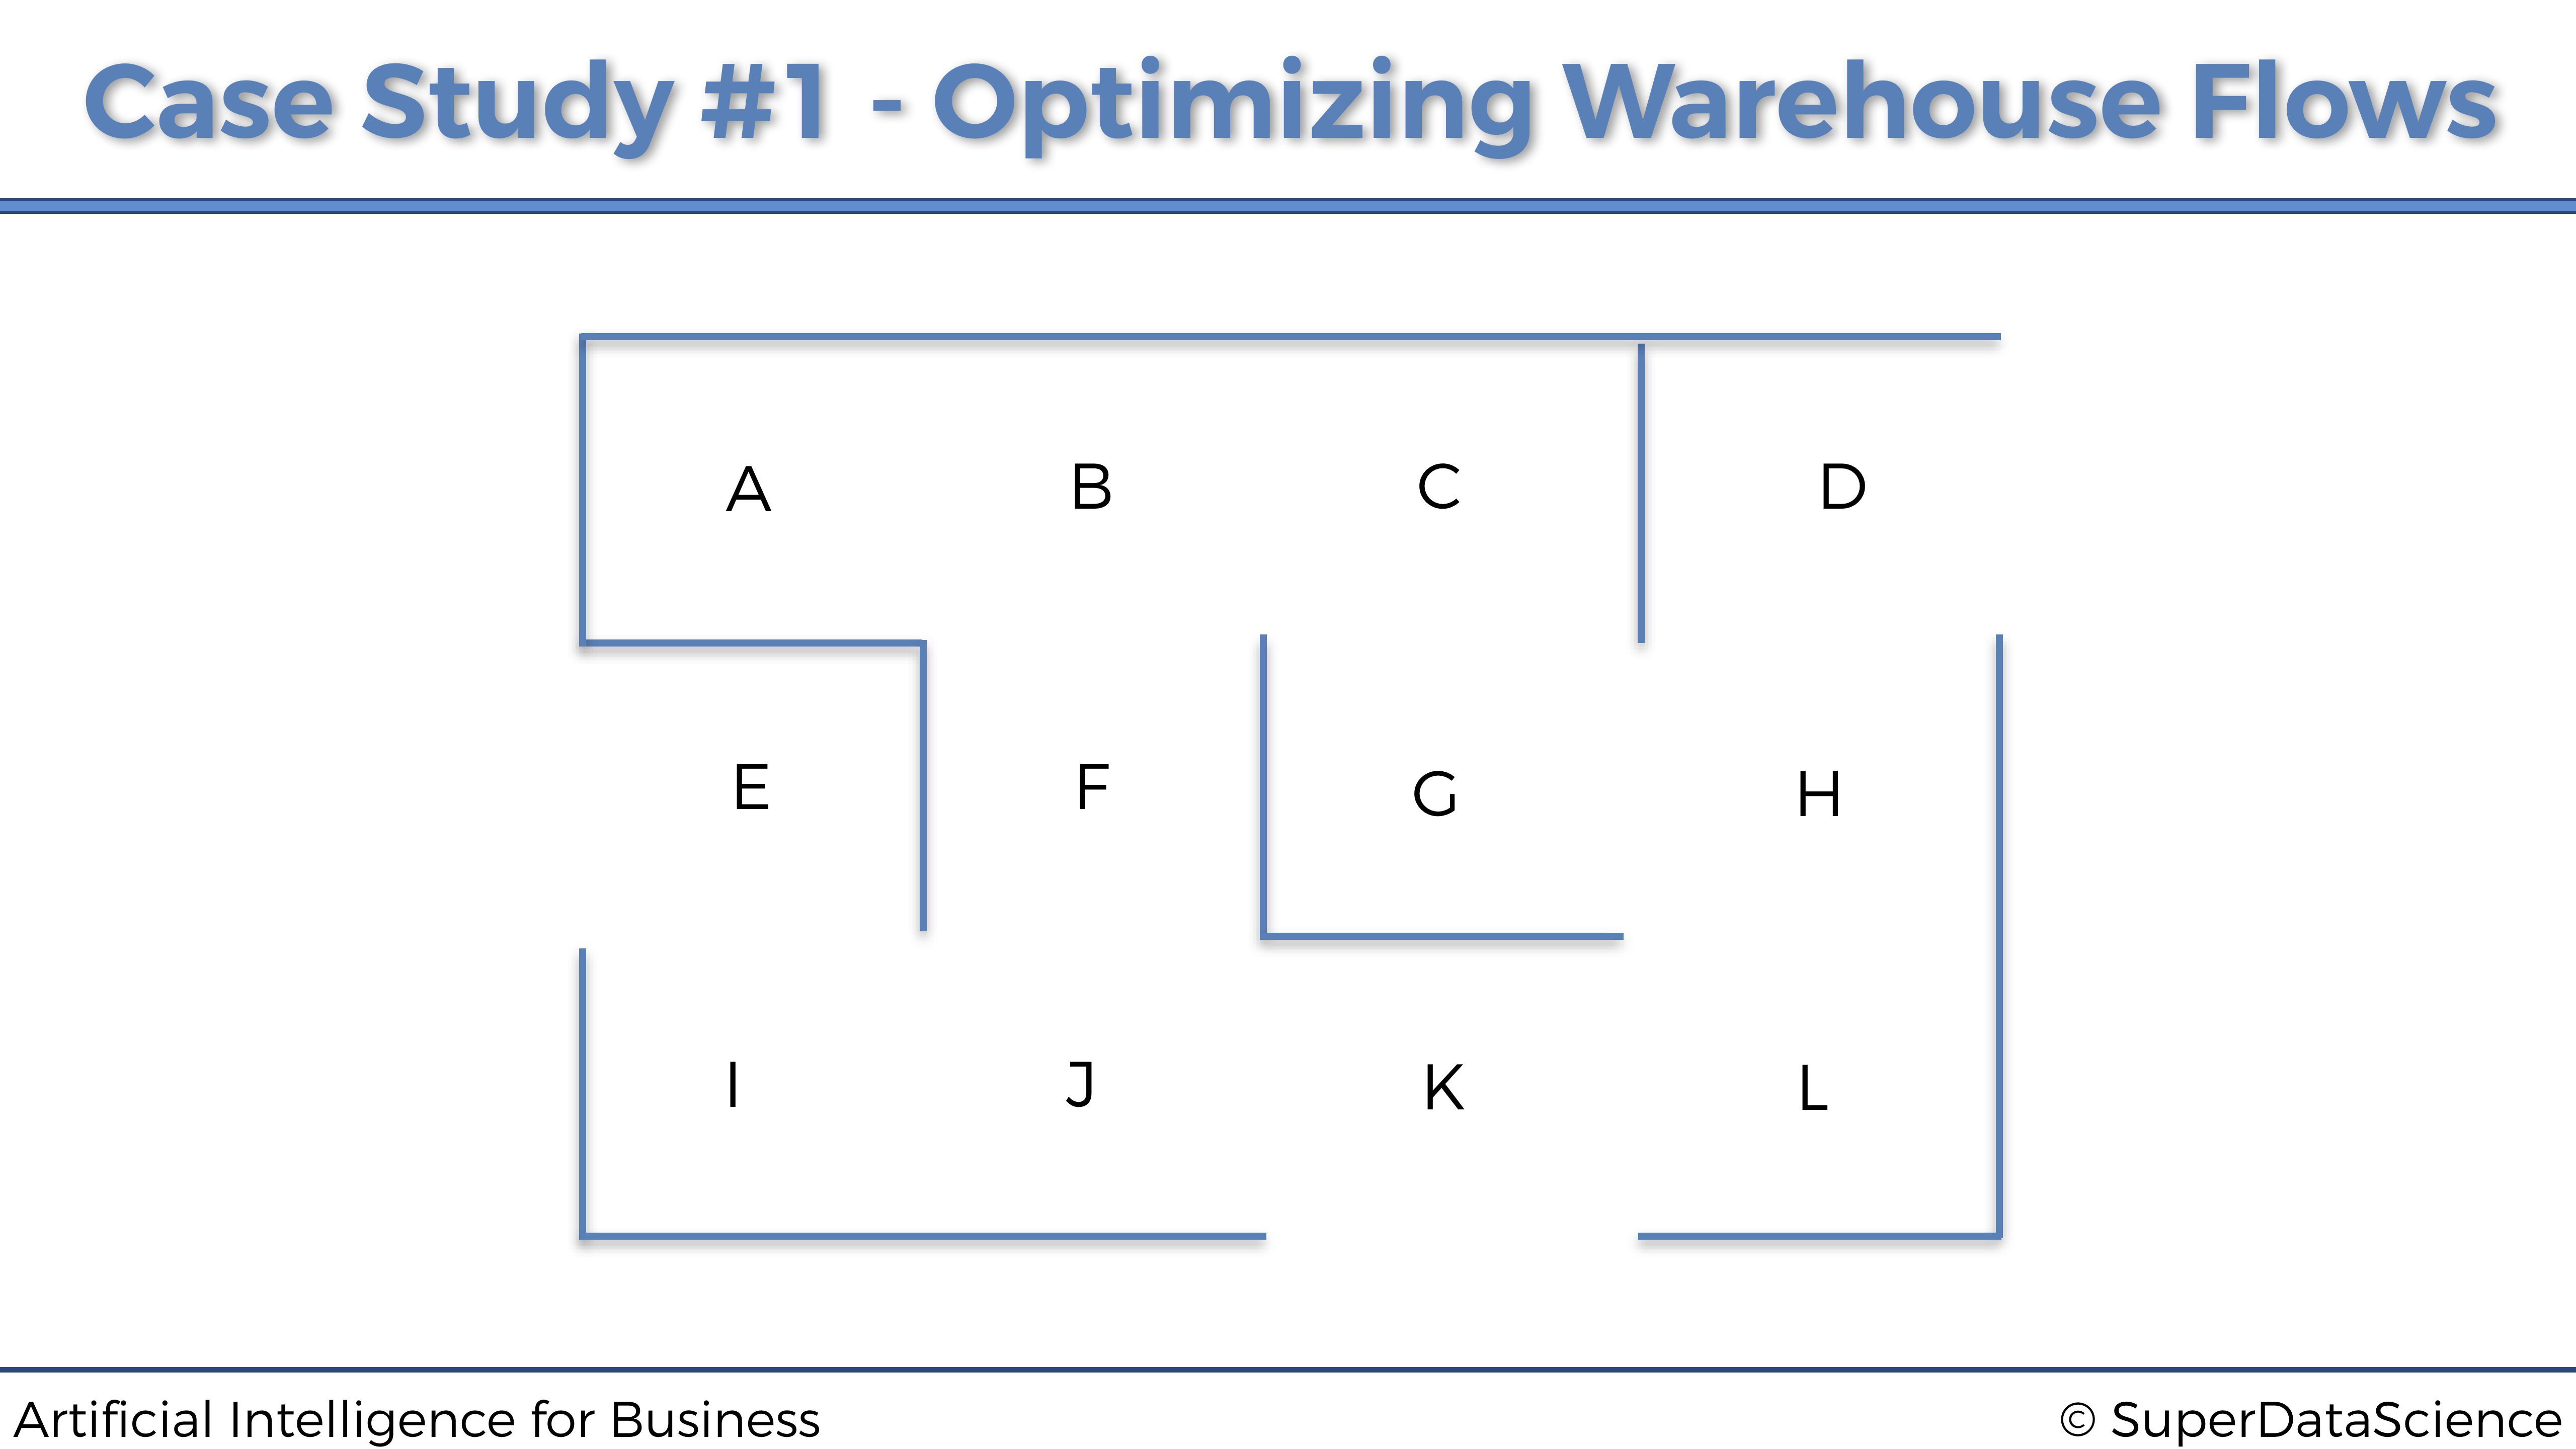

In [ ]:
import numpy as np

In [ ]:
# Setting the hyperparameters
gamma = 0.75 #discount factor
alpha = 0.9 #learning rate

# Part 1: Defining the Environment

In [ ]:
#Defining the States: Mapping the location names to indexes
location_to_state = {'A':0,
                     'B':1,
                     'C':2,
                     'D':3,
                     'E':4,
                     'F':5,
                     'G':6,
                     'H':7,
                     'I':8,
                     'J':9,
                     'K':10,
                     'L':11}

In [ ]:
#Defining the actions: each action index corresponds to the next state (next location) where that action leads to
actions=[0,1,2,3,4,5,6,7,8,9,10,11]

In [ ]:
# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,1,0,0,0,0,0,0],
               [0,1,0,0,0,0,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0],
               [0,1,0,0,0,0,0,0,0,1,0,0],
               [0,0,1,0,0,0,1000,1,0,0,0,0],
               [0,0,0,1,0,0,1,0,0,0,0,1],
               [0,0,0,0,1,0,0,0,0,1,0,0],
               [0,0,0,0,0,1,0,0,1,0,1,0],
               [0,0,0,0,0,0,0,0,0,1,0,1],
               [0,0,0,0,0,0,0,1,0,0,1,0]])



# Part 2 - Building the AI Solution with Q-Learning.

In [ ]:
#Initialising the states
Q=np.array(np.zeros([12,12]))

In [ ]:
#Q-learning Algorithm
for i in range(500):
    current_state = np.random.randint(0,12)
    actions_doable = []
    for j in range(12):
        if(R[current_state, j]>0):
            actions_doable.append(j)

    #now here we know that our action is the next state we can go to
    next_state = np.random.choice(actions_doable)

    #computing Temporal Learning Now
    TD = R[current_state,next_state]+gamma*Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]

    #Updating Q values
    Q[current_state, next_state] = Q[current_state, next_state] + alpha*TD

In [ ]:
print(Q.astype(int))

[[   0 1657    0    0    0    0    0    0    0    0    0    0]
 [1240    0 2209    0    0 1239    0    0    0    0    0    0]
 [   0 1657    0    0    0    0 2950    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2213    0    0    0    0]
 [   0    0    0    0    0    0    0    0  700    0    0    0]
 [   0 1657    0    0    0    0    0    0    0  928    0    0]
 [   0    0 2213    0    0    0 3932 2209    0    0    0    0]
 [   0    0    0 1660    0    0 2950    0    0    0    0 1655]
 [   0    0    0    0  526    0    0    0    0  935    0    0]
 [   0    0    0    0    0 1241    0    0  689    0 1245    0]
 [   0    0    0    0    0    0    0    0    0  932    0 1661]
 [   0    0    0    0    0    0    0 2213    0    0 1246    0]]


# Part 3 - Going into Production

In [ ]:
#we will compute the optimal path from
# any starting location to any ending top priority location.

In [ ]:
# Making a mapping from the states to the locations
state_to_location = {state: location for location,state in location_to_state.items()}

In [ ]:
state_to_location.items()

dict_items([(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E'), (5, 'F'), (6, 'G'), (7, 'H'), (8, 'I'), (9, 'J'), (10, 'K'), (11, 'L')])

In [ ]:
# #Route function that will return the optimal path
# optimal_route=[]
# def route(start,end):
#     start_index=location_to_state[start]
#     end_index = location_to_state[end]

#     next_state = np.argmax(Q[start_index,])
#     optimal_route.append(state_to_location[next_state])
#     route(state_to_location[next_state],end)

In [ ]:
#Route function that will return the optimal path
def route(start,end):
    optimal_path=[start]
    next_location = start
    while(next_location!=end):
        start_index=location_to_state[start]
        next_state=np.argmax(Q[start_index,])
        next_location = state_to_location[next_state]
        optimal_path.append(next_location)
        start = next_location
    return optimal_path


In [ ]:
route('E','G')


['E', 'I', 'J', 'K', 'L', 'H', 'G']

We have a first version of the model that is well functioning. But we can improve it in two ways. First, by `automating the reward attribution` to the top priority location, so that we don’t have to do it manually. And second, by adding a feature that gives us the option to go by an intermediary location before going to the top priority location. That `intermediary location` should be of course in the Top 3 priority locations.

Let’s implement the firs improvement, that automates the reward attribution

Now as we are updating the rewards acc to priority location we have to make a new Reward matrix `R_new`
 and We have to implement the Q learning algo inside the initialisation step


In [ ]:
# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,1,0,0,0,0,0,0],
               [0,1,0,0,0,0,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0],
               [0,1,0,0,0,0,0,0,0,1,0,0],
               [0,0,1,0,0,0,1,1,0,0,0,0],
               [0,0,0,1,0,0,1,0,0,0,0,1],
               [0,0,0,0,1,0,0,0,0,1,0,0],
               [0,0,0,0,0,1,0,0,1,0,1,0],
               [0,0,0,0,0,0,0,0,0,1,0,1],
               [0,0,0,0,0,0,0,1,0,0,1,0]])

In [ ]:
def route_new(start, end):
    R_new = np.copy(R)
    end_index = location_to_state[end]
    R_new[end_index,end_index]=1000
    Q=np.array(np.zeros([12,12]))
    for i in range(1000):
        current_state = np.random.randint(0,12)
        actions = []
        for j in range(12):
            if(R_new[current_state,j]>0):
                actions.append(j)

        next_state = np.random.choice(actions)

        TD = R_new[current_state,next_state] + gamma*(Q[next_state,np.argmax(Q[next_state,])]) - Q[current_state,next_state]
        Q[current_state,next_state]=Q[current_state,next_state]+alpha*TD

    print('Q_values:',Q.astype(int))
    route=[start]
    next_loc = start
    while(next_loc!=end):
        start_index=location_to_state[start]
        next_state = np.argmax(Q[start_index,])
        next_loc = state_to_location[next_state]
        route.append(next_loc)
        start = next_loc
    return route


In [ ]:
route_new('E','G')

Q_values: [[   0 1688    0    0    0    0    0    0    0    0    0    0]
 [1266    0 2250    0    0 1266    0    0    0    0    0    0]
 [   0 1689    0    0    0    0 3000    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2250    0    0    0    0]
 [   0    0    0    0    0    0    0    0  714    0    0    0]
 [   0 1688    0    0    0    0    0    0    0  951    0    0]
 [   0    0 2251    0    0    0 3998 2250    0    0    0    0]
 [   0    0    0 1689    0    0 2999    0    0    0    0 1689]
 [   0    0    0    0  536    0    0    0    0  951    0    0]
 [   0    0    0    0    0 1267    0    0  714    0 1267    0]
 [   0    0    0    0    0    0    0    0    0  951    0 1689]
 [   0    0    0    0    0    0    0 2250    0    0 1267    0]]


['E', 'I', 'J', 'K', 'L', 'H', 'G']

Now let's tackle the second thing: Assigning a weight greater than 1 but less than 1000 to 2nd and 3rd priorities.

In [ ]:
# Defining the rewards
R_one = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,1,0,0,0,0,0,0],
               [0,1,0,0,0,0,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0],
               [0,1,0,0,0,0,0,0,0,1,0,0],
               [0,0,1,0,0,0,1,1,0,0,0,0],
               [0,0,0,1,0,0,1,0,0,0,0,1],
               [0,0,0,0,1,0,0,0,0,1,0,0],
               [0,0,0,0,0,1,0,0,1,0,500,0], #for favouring J to K
               [0,0,0,0,0,0,0,0,0,1,0,1],
               [0,0,0,0,0,0,0,1,0,0,1,0]])

2. We can assign bad(Negative) Rewards to the alternative paths so the Q-learning process will never use it.

In [ ]:
# Defining the rewards
R_neg = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,1,0,0,0,0,0,0],
               [0,1,0,0,0,0,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0],
               [0,1,0,0,0,0,0,0,0,1,0,0],
               [0,0,1,0,0,0,1,1,0,0,0,0],
               [0,0,0,1,0,0,1,0,0,0,0,1],
               [0,0,0,0,1,0,0,0,0,1,0,0],
               [0,0,0,0,0,-500,0,0,1,0,1,0],
               [0,0,0,0,0,0,0,0,0,1,0,1],
               [0,0,0,0,0,0,0,1,0,0,1,0]])

In [ ]:
def best_route(start , middle , end):
    return route_new(start,middle) + route_new(middle , end)[1:]

In [ ]:
best_route('E','K','G')

Q_values: [[   0 1252    0    0    0    0    0    0    0    0    0    0]
 [ 932    0  936    0    0 1671    0    0    0    0    0    0]
 [   0 1253    0    0    0    0 1240    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1652    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1661    0    0    0]
 [   0 1232    0    0    0    0    0    0    0 2227    0    0]
 [   0    0  929    0    0    0 1240 1652    0    0    0    0]
 [   0    0    0 1240    0    0 1240    0    0    0    0 2227]
 [   0    0    0    0 1246    0    0    0    0 2227    0    0]
 [   0    0    0    0    0 1658    0    0 1661    0 2968    0]
 [   0    0    0    0    0    0    0    0    0 2224 3959 2225]
 [   0    0    0    0    0    0    0 1671    0    0 2970    0]]
Q_values: [[   0 1686    0    0    0    0    0    0    0    0    0    0]
 [1264    0 2247    0    0 1264    0    0    0    0    0    0]
 [   0 1686    0    0    0    0 2995    0    0    0    0    0]
 [   0    0    0    0    0    0   

['E', 'I', 'J', 'K', 'L', 'H', 'G']

In [ ]:
best_route('D','B','A')

Q_values: [[   0 2995    0    0    0    0    0    0    0    0    0    0]
 [2246 3993 2243    0    0 2245    0    0    0    0    0    0]
 [   0 2992    0    0    0    0 1682    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1261    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1263    0    0    0]
 [   0 2992    0    0    0    0    0    0    0 1679    0    0]
 [   0    0 2245    0    0    0 1683 1261    0    0    0    0]
 [   0    0    0  929    0    0 1684    0    0    0    0  947]
 [   0    0    0    0  923    0    0    0    0 1683    0    0]
 [   0    0    0    0    0 2245    0    0 1257    0 1260    0]
 [   0    0    0    0    0    0    0    0    0 1679    0  943]
 [   0    0    0    0    0    0    0 1261    0    0 1260    0]]
Q_values: [[3999 2250    0    0    0    0    0    0    0    0    0    0]
 [3000    0 1688    0    0 1689    0    0    0    0    0    0]
 [   0 2251    0    0    0    0 1267    0    0    0    0    0]
 [   0    0    0    0    0    0   

['D', 'H', 'G', 'C', 'B', 'A']